In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import PIL
import pathlib
import visualkeras
import glob
import tensorflow as tf 
from tensorflow import keras 


In [2]:
train_path=pathlib.Path("E:/data_science/bird_classification/train")
valid_path=pathlib.Path("E:/data_science/bird_classification/valid")
test_path=pathlib.Path("E:/data_science/bird_classification/test")

In [3]:
train_image_count=len(list(train_path.glob('*/*.jpg')))
train_image_count

58388

In [4]:
batch_size=32
image_height=224
image_width=224
train_ds=keras.preprocessing.image_dataset_from_directory(train_path,seed=123,batch_size=batch_size,image_size=(image_height,image_width))
valid_ds=keras.preprocessing.image_dataset_from_directory(valid_path,seed=123,batch_size=batch_size,image_size=(image_height,image_width))
test_ds=keras.preprocessing.image_dataset_from_directory(test_path,seed=123,batch_size=batch_size,image_size=(image_height,image_width))

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [5]:
class_names = ["Zaragateiro-de-abbott",
"Atobá-de-abbott",
"Calau-grande",
"Grou-coroado-oriental",
"Cuco-esmeraldino",
"Peito-de-fogo-de-bico-azul",
"Ostraceiro-preto-africano",
"Albatroz",
"Tico-tico-pardo",
"Papagaio-alexandrino",
"Gralha-de-bico-amarelo",
"Pia-cobra-de-coroa-amarela",
"Alfaiate-de-pescoço-pardo",
"Água-mãe americana",
"Galeirão-americano",
"Pintassilgo-americano",
"Falcão-americano",
"Petinha-fulva",
"Mariquita-de-rabo-vermelho",
"Estrelinha",
"Ganso-andino",
"Vanellus resplendens",
"Pintassilgo-dos-andes",
"Biguatinga",
"Anianiau",
"Beija-flor-de-cabeça-magenta",
"Tamnofilídeo (Ipecuá)",
"eufonia-das-Antilhas",
"Apapane",
"Apóstolo",
"Soldadinho-do-Araripe",
"Tordo-cinza",
"Ibis-do-Japão",
"Amandava",
"Gralha-azul",
"Sanhaçu-de-encontro-azul",
"Chapim-de-cabeça-branca",
"Pato-de-baikal",
"Águia-de-cabeça-branca",
"Íbis-eremita",
"Estorninho-de-bali",
"Corrupião-laranja",
"Cambacica",
"Jacu-de-rabo-barrado",
"Eurylaimus javanicus",
"Pita-de-bandas",
"Pernilongo-de-peito-vermelho",
"Fuselo",
"Coruja-das-torres",
"Andorinha-das-chaminés",
"Rapazinho-barrado",
"Pato da Islândia",
"Mariquita-de-peito-baio",
"Barbudo-de-peito-vermelho",
"Araponga-do-Nordeste",
"Chapim-de-bigodes",
"Martim-pescador",
"Ave-do-paraíso",
"Eurylaimus ochromalus",
"Baza negra",
"Cacatua-preta-de-cauda-amarela",
"Francolim-negro",
"Talha-mar",
"Cisne Negro",
"Amaurornis bicolor",
"Chapim-de-garganta-preta",
"Toutinegra-de-garganta-azul",
"Urubu-de-cabeça-preta",
"Chapim-de-bico-preto",
"Mergulhão-de-pescoço-preto",
"Pardal-de-garganta-negra",
"Mariquita-papo-de-fogo",
"Pica-pau-de-cabeça-amarela",
"Coua caerulea",
"Tetraz-azul",
"Garça-azul-grande",
"Araçari-de-nariz-amarelo",
"Triste-pia",
"Piçango-de-cerdas",
"Chloropsis kinabaluensis",
"Faisão-pavão",
"Cormorão-de-Brandt",
"Trepadeira-americana",
"Andorinha-do-mar-preta",
"Thrasher marrom",
"Faisão-de-Bulwer",
"Peru-do-mato",
"Cacto-wren",
"Condor-da-califórnia",
"Gaivota-da-califórnia",
"Perdiz-da-califórnia",
"Canário",
"Estorninho-metálico",
"Garra-longa-de-garganta-laranja",
"Mariquita-do-cabo-may",
"Melro-das-rochas-do-cabo",
"Garça-real",
"Maú",
"Abelharuco-róseo",
"Gaivina-de-bico-vermelho",
"Casuar",
"Picoteiro-americano",
"Mariquita-azul",
"Gaio-de-colar-preto",
"Loris-amor-amor",
"Ferro-velho",
"Perdiz-de-bambu-chinesa",
"Garça-real-chinesa",
"Pardal-estilhaçador",
"Tapaculo-de-peito-ruivo",
"Perdiz-chucar",
"Tinguaçu-ferrugem",
"Papa-moscas de canela",
"Marreca-colorada",
"Nucifraga-columbiana",
"Galo-da-serra",
"Cacatua",
"Araçari-de-pescoço-preto",
"Estrelinha-de-cabeça-listada",
"Quiscalus quiscula",
"Andorinha-dos-beirais",
"Iora-comum",
"Mobelha-grande",
"Noitibó-de-nuttall",
"Estorninho",
"Cucal-cauda-de-cobre",
"Dromadidae",
"Gavião-pernilongo",
"Pica-pau-amarelo",
"Alca-de-crista",
"Carcará",
"Coua-de-crista",
"Lophura ignita",
"Martim-pescador com crista",
"Sitta carolinensis",
"Japu-preto",
"Shriketit-australiano",
"Bate-papo-carmesim",
"Aethopyga siparaja",
"Corvo",
"Goura",
"Tody-cubano",
"Tocororo",
"Araçari-mulato",
"Barbet-de-D'Arnaud",
"Junco-de-olhos-escuros",
"Grou-pequeno",
"Tentilhão-com-garras-duplas",
"Corvo-marinho-de-orelhas",
"Papagaio-de-figo-de-dois-olhos",
"Pica-pau-fofo",
"Pseudeos fuscata",
"Pitta-orelhudo",
"Pássaro-azul-oriental",
"Tecelão-de-ouro",
"Pedro-celouro",
"Rosella-multicolorida",
"Pardal-manchado",
"Elegante-trogon",
"Faisão-de-Elliot",
"Saíra-esmeralda",
"Pinguim-imperador",
"Ema-australiana",
"Enggano Myna",
"Papa-figos",
"Pega-rabuda",
"Pintassilgo",
"Rola-comum",
"Coccothraustes vespertinus",
"Irena",
"Andorinha-do-mar das fadas",
"Pinguim-de-Fiordland",
"Myzornis pyrrhoura",
"Sericulus ardens",
"Tanager-cor-de-fogo",
"Flamingo",
"Fragata",
"Perdiz-de-gambel",
"Cacatua-gang-gang",
"Pica-pau-gila",
"Cintilação-dourada",
"Íbis-preto",
"Crinifer concolor",
"Toutinegra-asa-de-ouro",
"Toutinegra-de-bochecha-dourada",
"Chlorophonia callophrys",
"Águia-real",
"Faisão-dourado",
"Pipinha-dourada",
"Diamante-de-gould",
"Dumetella carolinensis",
"Suiriri-cinza",
"Perdiz-cinzenta",
"Coruja-cinzenta",
"Jacamaraçu",
"Bem-te-vi",
"Urutau-grande",
"Perdiz-grande",
"Calyptomena viridis",
"Gaio-verde",
"Cissa chinesa",
"Tarambola-cinzenta",
"Crotophaga sulcirostris",
"Tauraco persa",
"Numididae",
"Pita-de-gurney",
"Falcão-gerifalte",
"Cabeça-de-martelo",
"Pato-arlequim",
"Codorniz-arlequim",
"Gavião-real",
"Ganso-do-havaí",
"Bico-grossudo",
"Vanga-de-prévost",
"Sanhaço-de-fogo",
"Tarsiger rufilatus",
"Faisão-do-nepal",
"Jacu-cigano",
"Merganso-capuchinho",
"Upupidae",
"Bicos-de-corno",
"Jacu-chifrudo",
"Calhandra-cornuda",
"Chifre-de-ouro",
"Haemorhous mexicanus",
"Pardal-doméstico",
"Arara-azul-grande",
"Charneco",
"Ibidorhyncha struthersii",
"Cormorão imperial",
"Gaviotinha-monja",
"Abetarda indiana",
"Pita de Bengala",
"Coracias benghalensis",
"Passerina cyanea",
"Atuíra-do-interior",
"Gaivota-marfim",
"Ívi",
"Jaburu",
"Narceja-galega",
"Jandaia-verdadeira",
"Larvivora akahige ",
"Calafate",
"Cagu",
"Caçapo",
"Borrelho-de-dupla-coleira",
"Urubu-rei",
"Quiuís ",
"Cucaburra",
"Calamospiza melanocorys",
"Passerina amoena",
"Marabu-pequeno",
"Rolieiro-de-peito-lilás",
"Torda-anã",
"Coruja-pequena",
"Anseranas semipalmata",
"Ocyceros griseus",
"Pica-peixe-de-poupa",
"Zosterops maderaspatanus",
"Maleo",
"Pato-real",
"Pato-mandarim",
"Papa-lagarta-do-mangue",
"Marabu",
"Atobá-grande",
" Abibe mascarado",
"Faisão Mikado",
"Rola-carpideira",
"Mainá ",
"Pombo-de-nicobar",
"Philemon corniculatus",
"Cardeal-do-norte",
"Northern flicker",
"Fulmar-glacial",
"Ganso-patola",
"Açor",
"Jaçanã-de-fronte-amarela",
"Tordo-imitador",
"Mariquita-azul",
"Bispo-laranja",
"Pato-trombeteiro",
"Peru-ocelado",
"Gallirallus okinawae",
"Passerina leclancherii",
"Coruja-baía-oriental",
"Águia-pesqueira",
"Avestruz-comum",
"Mariquita-de-coroa-ruiva",
"Ostraceiro ",
"Passerina ciris",
"Palila-do-havaí",
"Saira-do-paraiso",
"Torda-papagaio",
"Chapim-real",
"Phrygilus patagonicus",
"Pavão-azul",
"Pelicano",
"Falcão-peregrino",
"Águia-filipina",
"Petroica rodinogaster",
"Moleiro-pomarino",
"Papagaios-do-mar",
"Haemorhous purpureus",
"Frango-de-água-azul",
"Andorinha-azul",
"Caimão-comum",
"Pica-peixe-pigmeu",
"Quetzal-resplandecente",
"Lóris molucano",
"Torda-mergulheira",
"Abelharuco-ruivo",
"Erythropitta erythrogaster",
"Diamante de sobrancelhas vermelhas",
"Biguá-de-cara-vermelha",
"Mariquita-de-cara-vermelha",
"Tecelão de Madagascar",
"Zarro-americano ",
"Melanerpes erythrocephalus",
"Saíra-beija-flor",
"Harpactes kasumba",
"Búteo-de-cauda-vermelha",
"Leiotriquídeos",
"Graúna-de-asa-vermelha",
"Bulbul de bigode vermelho",
"Sericulus chrysocephalus",
"Faisão-coleira",
"Papa-léguas",
"Tordo-americano",
"Pombo-comum",
"Inseparável-de-faces-rosadas",
"Bútio-patudo",
"Maria-leque",
"Beija-flor–de-pescoço-vermelho",
"Halcyon coromanda",
"Actenoides concretus ",
"Juruva-ruiva",
"Garrulax bicolor",
"Andorinha-das-barreiras",
"Grou-canadiano",
"Faisão-de-chifre-vermelho",
"Ptilinopus porphyraceus",
"Guará",
"Araracanga",
"Sanhaçu-escarlate",
"Cegonha-bico-de-sapato",
"Maçarico-de-costas-brancas",
"Calcarius pictus",
"Garça-branca-pequena",
"Coruja-das-neves",
"Sora",
"Cotinga-pintada",
"Malurus splendens",
"Eurynorhynchus pygmeus",
"Colhereiro",
"Ailuroedus maculosus",
"Urocissa ornata",
"Patos-vapor",
"Pelargopsis capensis",
"Bengali-vermelho",
"Coruja-orelhuda",
"Tangará-riscado",
"Andorinha-estriada-pequena ",
"Lamprotornis superbus",
"Faisão-de-swinhoe",
"Orthotomus sutorius",
"Gralha-azul-de-Taiwan ",
"Takahe",
"Tribonyx mortierii",
"Marrequinha-comum",
"Baeolophus bicolor",
"Tucanos",
"Setophaga townsendi",
"Andorinha-das-árvores",
"Suiriri",
"Cisne-trombeteiro ",
"Urubu-de-cabeça-vermelha",
"Eumomota superciliosa",
"Anambé-preto",
"Tordo-variegado",
"Turpial",
"Príncipe",
"Goura victoria",
"Tachycineta thalassina",
"Turaco-violeta",
"Pintada-vulturina",
"Trepadeira-dos-muros ",
"Mutum-fava",
"Vanellus senegallus",
"Maçarico-galego",
"Porzana cinerea",
"Tauraco leucotis",
"Corvo-das-montanhas",
"Rabo-de-palha-de-bico-laranja",
"Abelharuco-de-garganta-branca",
"Peru-selvagem",
"Ave-do-paraíso de Wilson",
"Pato-carolino",
"Dicaeum melanoxanthum",
"Xexéu",
"Graúna-de-cabeça-amarela"]

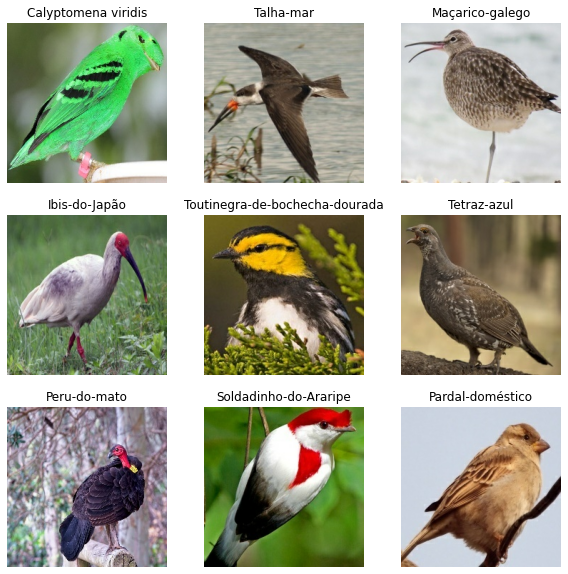

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [7]:
base_model = keras.applications.MobileNetV3Small(input_shape=(image_width, image_height, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

In [8]:
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_4[0][0]']                
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 28, 28, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_4[0][0]',             
 /Mul (Multiply)                                                  'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 14, 14, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 14, 14, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 14, 14, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_14[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 14, 14, 144)  3600       ['multiply_9[0][0]']             
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 14, 14, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 14, 14, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_18 (TFOpL  (None, 7, 7, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_23 (ReLU)                (None, 7, 7, 288)    0           ['tf.__operators__.add_18[0][0]']
                                                                                                  
 tf.math.multiply_18 (TFOpLambd  (None, 7, 7, 288)   0           ['re_lu_23[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_12 (Multiply)         (None, 7, 7, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_22 (TFOpL  (None, 1, 1, 576)   0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_25 (TFOpLambd  (None, 1, 1, 576)   0           ['re_lu_30[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 7, 7, 576)   0           ['multiply_16[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_25[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 7, 7, 96)    55296       ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

In [9]:
num_classes = len(class_names)# 7

inputs = keras.Input(shape=(image_width, image_height, 3))
#x = data_augmentation(inputs)
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 400)               230800    
                                                                 
Total params: 1,169,920
Trainable params: 230,800
Non-trainab

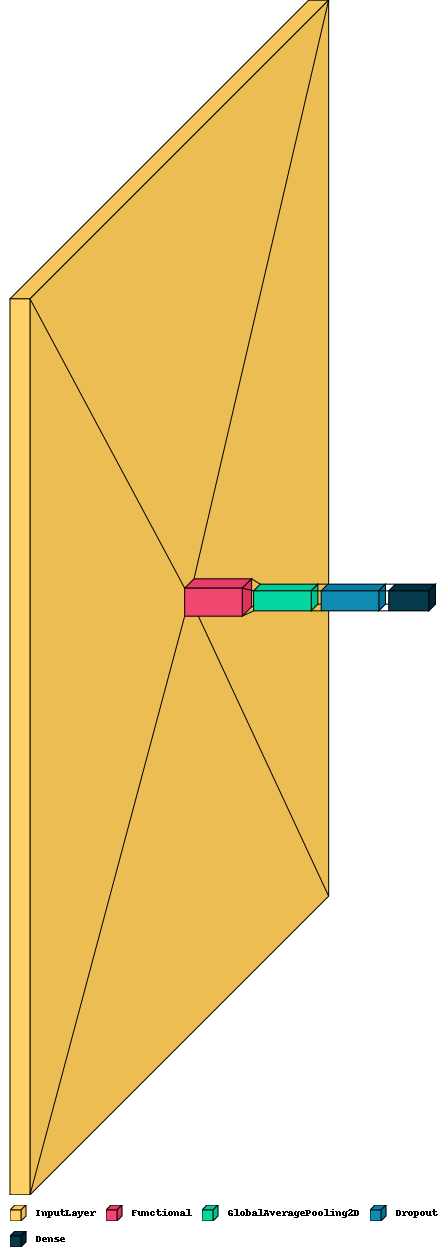

In [11]:
visualkeras.layered_view(model, legend=True) 

In [12]:
initial_epochs = 10

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

history = model.fit(train_ds, 
          validation_data=valid_ds,
          epochs=initial_epochs,
          callbacks=[early_stop],use_multiprocessing=True)


Epoch 1/10
1825/1825 [==============================] - 1247s 679ms/step - loss: 1.7512 - accuracy: 0.6683 - val_loss: 0.4718 - val_accuracy: 0.9155
Epoch 2/10
1825/1825 [==============================] - 616s 337ms/step - loss: 0.6039 - accuracy: 0.8650 - val_loss: 0.2853 - val_accuracy: 0.9455
Epoch 3/10
1825/1825 [==============================] - 578s 317ms/step - loss: 0.4424 - accuracy: 0.8940 - val_loss: 0.2306 - val_accuracy: 0.9520
Epoch 4/10
1825/1825 [==============================] - 559s 306ms/step - loss: 0.3583 - accuracy: 0.9108 - val_loss: 0.2015 - val_accuracy: 0.9515
Epoch 5/10
1825/1825 [==============================] - 577s 316ms/step - loss: 0.3068 - accuracy: 0.9231 - val_loss: 0.1843 - val_accuracy: 0.9540
Epoch 6/10
1825/1825 [==============================] - 607s 333ms/step - loss: 0.2706 - accuracy: 0.9294 - val_loss: 0.1755 - val_accuracy: 0.9545
Epoch 7/10
1825/1825 [==============================] - 604s 331ms/step - loss: 0.2430 - accuracy: 0.9354 - val

In [13]:
initial_epochs = len(history.history['accuracy'])  

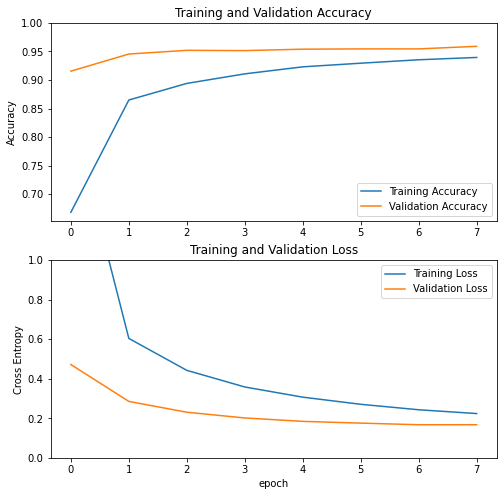

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 1s 1s/step


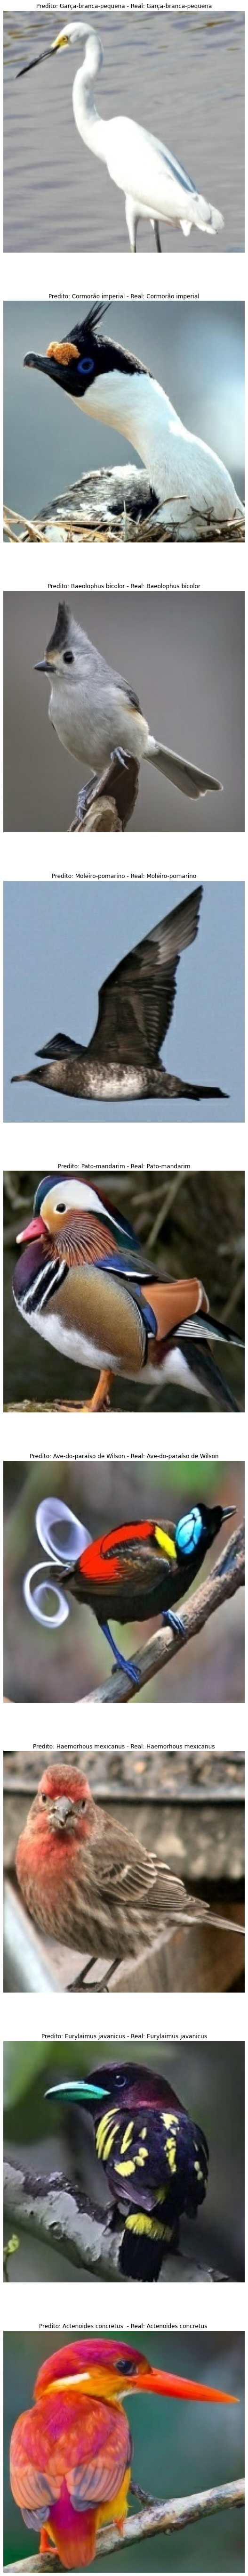

In [15]:
plt.figure(figsize=(10, 100))
for images, labels in test_ds.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
        ax = plt.subplot(9, 1, i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predito: {class_names[pred]} - Real: {class_names[labels[i]]}')
        plt.axis('off')

In [16]:
model.evaluate(test_ds)

63/63 [==============================] - 23s 362ms/step - loss: 0.1249 - accuracy: 0.9660


[0.12490611523389816, 0.9660000205039978]